### 19.1M Write a function my_nth_root(x,n,tol) where x and tol are strictly positive scalars, and n is an integer strictly greaterr than 1. The output argument, r, should be an approximation r =nsqrt(x), the Nth root of x. This approximation should be computed by using the Newton-Raphson method to find the root of the function f(y)=y^N - x. The error metric should be < 10^7.

In [1]:
from math import *


def my_nth_root(x, n, tol):
    f = lambda y: y ** n - x
    fprime = lambda y: n * (y ** (n - 1))
    xi = x
    if tol > 7:
        tol = 7
    err_stop = 1 * (10 ** -tol)
    root_data = [xi]
    rel_err = 1.1 * err_stop
    max_iter = 200
    for i in range(0, max_iter):
        xi_plus_1 = xi - f(xi) / fprime(xi)
        root_data.append(xi_plus_1)
        rel_err = abs((xi_plus_1 - xi) / xi_plus_1)
        if rel_err <= err_stop:
            break
        xi = xi_plus_1
    print(root_data[len(root_data) - 1])

if __name__ == '__main__':
    x = float(input("Enter a x value "))
    n = float(input("Enter a y value "))
    tol = int(input("Enter tol value "))
    my_nth_root(x, n, tol)

Enter a x value 64
Enter a y value 3
Enter tol value 7
4.0


### 19.2M Write a function my_fixed_point(f,g,tol,max_iter) where f and g are function objects, and tol and max_iter are strictly positive scalars. The input argument, max_iter, is also an intger. The output argument, X, should be a scalar satisfying if(x)-g(X)<tol,that is, X is a point that (almost) satisfies f(x) = g(x). To find X, you should use the bisection method with the error metric, |F(m)|<tol. The function my_fixed_point should give up after max_iter numbers of iterations and return x = [] if this occurs.

Enter tol value 7
Enter max_iter value 5


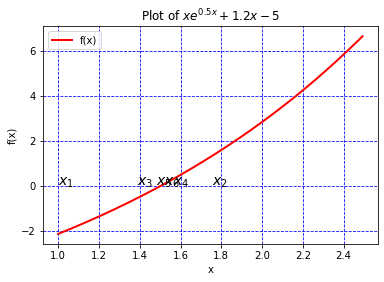

In [2]:
import numpy as np
import sympy
from math import *

from psm_plot import FunctionRootPlot111


def g_string():
    fn_string = "5/(exp(0.5*x)+1.2)"
    return fn_string


def f_string():
    fn_string = "x*exp(0.5*x)+1.2*x -5"
    return fn_string


def f(x):
    string = f_string()
    tmp = eval(string)
    return tmp


def g(x):
    string = g_string()
    tmp = eval(string)
    return tmp


def my_fixed_point(f, g, tol, max_iter):
    xold = 1.0
    root_approx = [xold]
    if tol > 7:
        tol = 7
    err_stop = 1 * (10 ** -tol)
    rel_err = 1.1 * err_stop
    count = 0
    table = [["i", "root approx.", "rel. error"]]
    for i in range(0, max_iter):
        count += 1
        tmp = g(xold)
        xnew = tmp
        root_approx.append(xnew)
        if count > 1:
            rel_err = abs((xnew - xold) / xnew)
            table.append([i + 1, xnew, f"{rel_err:.2e}"])
            if rel_err <= err_stop:
                break
        else:
            table.append([i + 1, xnew, "NA"])
        xold = xnew
    x_start = 1
    x_end = 2.5
    x = np.linspace(x_start, x_end, 100)
    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "fixed_point.png"
    xlabel = "x"
    ylabel = "f(x)"
    root_data_label = "root approximations"
    y_func_label = function_name
    FunctionRootPlot111(x, xlabel, f, ylabel, root_approx, root_data_label, title, filename)


if __name__ == '__main__':
    tol = int(input("Enter tol value "))
    max_iter = int(input("Enter max_iter value "))
    my_fixed_point(f, g, tol, max_iter)


### 19.5M write a function my_newton(f,df,x0,tol) that returns [R,E], where f is a function object, df is a function object giving the derivative of f, x0 is an initial estimation of the root, and tol is a strictly positie scalar. The function should return an array, R, where R[i] is the Newton-Raphson estimate of the root of f for the ith iteration. Remember to include the initial estimate. The function should also return an array,E, where E[i] is the value of |f(R[i])| for the ith iteration of the newton-raphson method. The function should terminate when E(i) < tol. Assume that the derivative of f will not hit zero during any iteration for any of the test cases given.

In [3]:
from math import *
from tabulate import tabulate
import numpy as np


def my_newton(f, df, x0, tol):
    xi = x0
    table = []
    if tol < 1e-7:
        tol = 1e-7
    err_stop = tol
    root_data = [xi]
    edata = []
    rel_err = 1.1 * err_stop
    max_iter = 200
    for i in range(0, max_iter):
        xi_plus_1 = xi - f(xi) / df(xi)
        root_data.append(xi_plus_1)
        edata.append(abs(f(root_data[i])))
        rel_err = abs((xi_plus_1 - xi) / xi_plus_1)
        if rel_err <= err_stop:
            break
        xi = xi_plus_1
    root_data.pop(len(root_data) - 1)
    print(f"R = {root_data}")
    print(f"E = {edata}\n")


if __name__ == '__main__':
    f = lambda x: x ** 2 - 2
    df = lambda x: 2 * x
    my_newton(f, df, 1, 1e-5)
    f = lambda x: np.sin(x) - np.cos(x)
    df = lambda x: np.cos(x) + np.sin(x)
    my_newton(f, df, 1, 1e-5)

R = [1, 1.5, 1.4166666666666667, 1.4142156862745099]
E = [1, 0.25, 0.006944444444444642, 6.007304882871267e-06]

R = [1, 0.782041901539138, 0.7853981759997019]
E = [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08]



### SP1

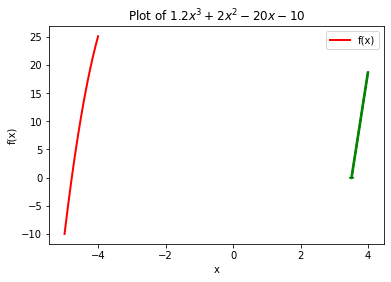

Root =  3.6022583587048023


In [4]:
from math import *
import numpy as np
import sympy
from psm_plot import *


def f_string():
    fn_string = '(1.2*x**3) + (2*x**2) -(20*x) - 10'
    return fn_string


def f(x):
    string = f_string()
    tmp = eval(string)
    return tmp


def main():
    a = -4.0
    b = -5.0
    x_start = a
    x_end = b
    xi = 4.0
    err_stop = 1e-7
    root_data = [xi]
    rel_err = 1.1 * err_stop
    max_iter = 200
    for i in range(0, max_iter):
        xi_plus_1 = xi - ((f(xi) * ((xi - 1) - xi)) / (f(xi - 1) - f(xi)))
        root_data.append(xi_plus_1)
        rel_err = abs((xi_plus_1 - xi) / xi_plus_1)
        if rel_err <= err_stop:
            break
        xi = xi_plus_1
    x = np.linspace(x_start, x_end, 100)

    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "single_iteration_of_newton_raphson.png"
    xlabel = "x"
    ylabel = "f(x)"
    root_data_label = "root approximations"
    y_func_label = function_name
    FunctionRootPlot111_newton_raphson(x, xlabel, f, ylabel, root_data, root_data_label, title, filename, 1)
    print("Root = ",root_data[len(root_data) - 1])


if __name__ == '__main__':
    main()


### SP2

[1, -0.7182818284590451, 0.06019705656414598, -2.051174752167541, 11.49336983101289]


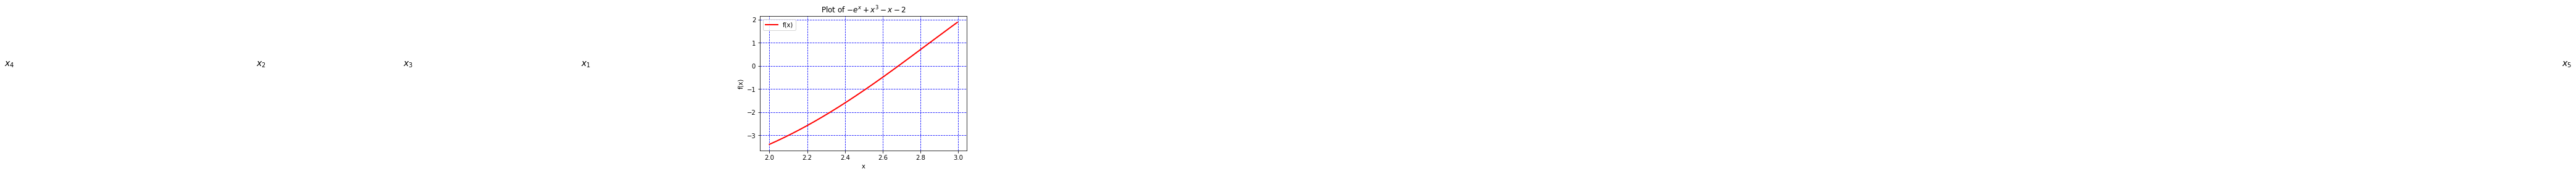

In [5]:
from math import *
import numpy as np
import sympy
from psm_plot import *


def g_string():
    fn_string = "(3*x**2)-1-e**x"
    return fn_string

def g(x):
    string = g_string()
    tmp = eval(string)
    return tmp

def f_string():
    fn_string = "(x**3)-(x)-(e**x)-(2)"
    return fn_string


def f(x):
    string = f_string()
    tmp = eval(string)
    return tmp


def my_fixed_point(g):
    xold = 1
    root_approx = [xold]
    err_stop = 1e-7
    rel_err = 1.1 * err_stop
    count = 0
    max_iter = 4
    tol = 7.0
    for i in range(0, max_iter):
        count += 1
        tmp = g(xold)
        xnew = tmp
        root_approx.append(xnew)
        if count > 1:
            rel_err = abs((xnew - xold) / xnew)
            if rel_err <= err_stop:
                break
        xold = xnew
    print(root_approx)
    x_start = 2
    x_end = 3
    x = np.linspace(x_start, x_end, 100)
    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "fixed_pointG.png"
    xlabel = "x"
    ylabel = "f(x)"
    root_data_label = "root approximations"
    y_func_label = function_name
    FunctionRootPlot111(x, xlabel, f, ylabel, root_approx, root_data_label, title, filename)


if __name__ == '__main__':
    my_fixed_point(g)


### SP3

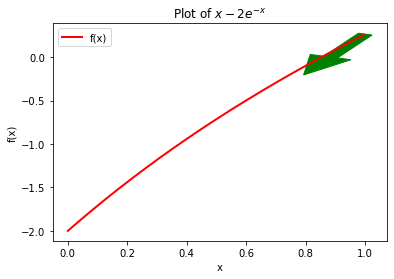

Root =  0.8526055282943936


In [6]:
from math import *
import numpy as np
import sympy

from psm_plot import *


def f_string():
    fn_string = 'x-(2*e**-x)'
    return fn_string


def f(x):
    string = f_string()
    tmp = eval(string)
    return tmp


def main():
    a = 0
    b = 1
    x_start = a
    x_end = b
    xi = 1
    err_stop = 1e-7
    root_data = [xi]
    rel_err = 1.1 * err_stop
    max_iter = 200
    for i in range(0, max_iter):
        xi_plus_1 = xi - ((f(xi) * ((xi - 1) - xi)) / (f(xi - 1) - f(xi)))
        root_data.append(xi_plus_1)
        rel_err = abs((xi_plus_1 - xi) / xi_plus_1)
        if rel_err <= err_stop:
            break
        xi = xi_plus_1
    x = np.linspace(x_start, x_end, 100)

    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "single_iteration_of_newton_raphson.png"
    xlabel = "x"
    ylabel = "f(x)"
    root_data_label = "root approximations"
    y_func_label = function_name
    FunctionRootPlot111_newton_raphson(x, xlabel, f, ylabel, root_data, root_data_label, title, filename, 1)
    print("Root = ",root_data[len(root_data) - 1])


if __name__ == '__main__':
    main()


### SP4

[1, 0.33333333333333326, -2.800139705086507]


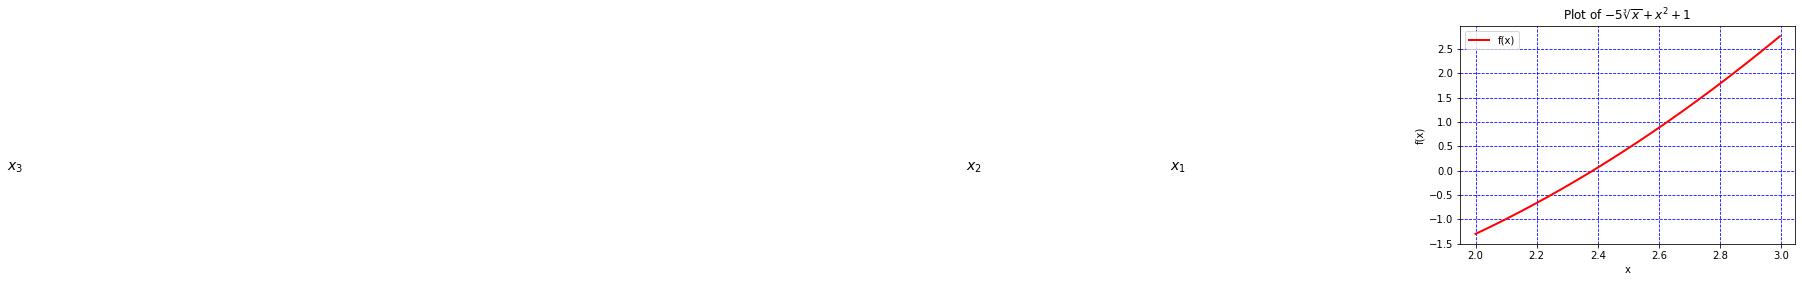

In [7]:
from math import *
import numpy as np
import sympy
from psm_plot import *


def g_string():
    fn_string = "(2*x)-(5/(3*x**(2/3)))"
    return fn_string

def g(x):
    string = g_string()
    tmp = eval(string)
    return tmp

def f_string():
    fn_string = "(x**2) - (5*x**(1/3)) + 1"
    return fn_string


def f(x):
    string = f_string()
    tmp = eval(string)
    return tmp


def my_fixed_point(g):
    xold = 1
    root_approx = [xold]
    err_stop = 1e-7
    rel_err = 1.1 * err_stop
    count = 0
    max_iter = 2
    tol = 7.0
    for i in range(0, max_iter):
        count += 1
        tmp = g(xold)
        xnew = tmp
        root_approx.append(xnew)
        if count > 1:
            rel_err = abs((xnew - xold) / xnew)
            if rel_err <= err_stop:
                break
        xold = xnew
    print(root_approx)
    x_start = 2
    x_end = 3
    x = np.linspace(x_start, x_end, 100)
    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "fixed_pointG.png"
    xlabel = "x"
    ylabel = "f(x)"
    root_data_label = "root approximations"
    y_func_label = function_name
    FunctionRootPlot111(x, xlabel, f, ylabel, root_approx, root_data_label, title, filename)


if __name__ == '__main__':
    my_fixed_point(g)
